In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/bgrazda/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

In [2]:
# FINAL CODE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a. Read in dataframe and examine first five values
catch_data = pd.read_csv('data/salmon_data.csv')

catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b. Look at data types and information about the daata frame
print(catch_data.dtypes)
print(catch_data.shape)

Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
(8540, 5)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I decided to look at the data types of each column so that I know what is stored in each of these columns. I noted that the `year` column is an integer, and that i may have to potentially change this to a DateTime object later. The region, noteregcode, species, and catch values are all stored as strings. Likewise, I used the shape attribute to see the dimensions of the data frame. I learned that there are 8540 rows and 5 columns.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [6]:
# Does not modify in place, so we must reassign the dataframe to itself after dropping the `notesRegCode` column, verify by using columns attribute
catch_data = catch_data.drop(columns = ['notesRegCode'])
print(catch_data.columns)

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


Not all columns have the expected data types. For example, the year data can be an int, but it could also be expected as a DateTime object. The Catch column is a string object, when the values in the column should be expected to be integers.

In [7]:
# dtypes attribute to view the data types compared to expected data types
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [8]:
# Tested; error as expected
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [9]:
# Find the position in catch data where the Catch column is equal to I and assign it to new variable
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [10]:
# Find the position in catch data where the column catch equals I and update it to equal 1
catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1

# Find the row and store the series in the variable
catch_1 = catch_data.loc[400]
print(catch_1)


Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object


## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [20]:
# Call Catch column and convert the entire column as type int, confirm that the replacement of I to 1 works when the column successfully runs
catch_data['Catch'] = catch_data['Catch'].astype('int')

# Store the data type into the catch_column_type
catch_column_type = catch_data['Catch'].dtype
print(catch_column_type)

Region     object
Year        int64
Species    object
Catch       int64
dtype: object
int64


## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [16]:
# Select region as adult and take the mean of Catch column, re-assign series to frame and add
avg_region = catch_data.groupby('Region').Catch.mean()
avg_region = avg_region.to_frame().reset_index()

avg_region

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

Text(0.5, 1.0, 'Average Salmon Catches from 1878 to 1997')

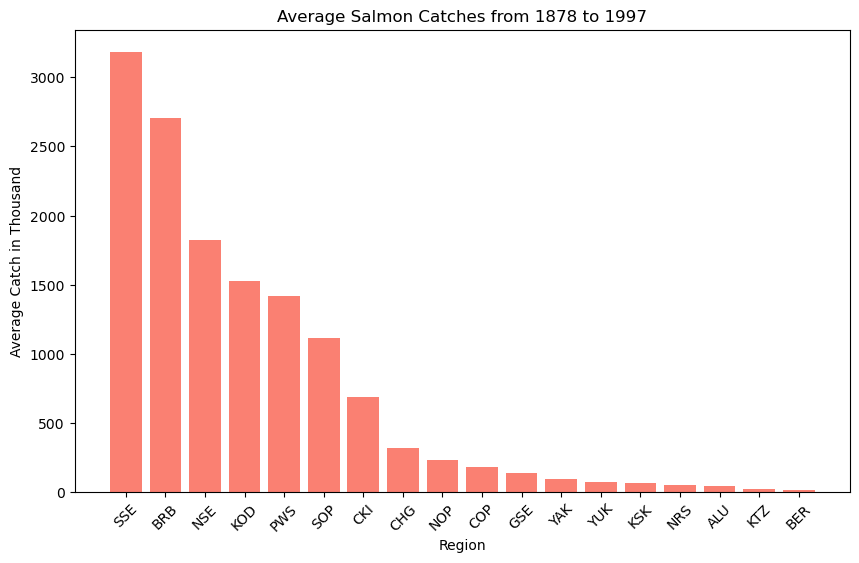

In [24]:
# Declare fig size that we want to visualize with descending averages per region
plt.figure(figsize = (10,6))
avg_region = avg_region.sort_values('Catch', ascending= False)

# Matplotlib bar method, tick marks are overlapping with each other so we have to specify rotation 
plt.bar(data = avg_region,
        x = 'Region',
        height = 'Catch',
       color = 'salmon')
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Average Catch in Thousand')
plt.title('Average Salmon Catches from 1878 to 1997')



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

Southern Southeast Alaska had the greatest average catches of salmon from 1878 to 1997. Bristol Bay Management Area had the second largest average catch of salmon, and the Bering River Subarea had the lowest average amount of salmon catches. There is a significant gap between the 6 highest regional catches and the regions with the lowest averages.

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).